In [12]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as I

import input_data

In [13]:
# get MNIST data
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [56]:
trainX,trainY = mnist.train.next_batch(100)

In [47]:
def plotim(vec_im,cmap='gray'):
    plt.imshow(vec_im.reshape([28,28]),cmap=cmap)
    plt.show()

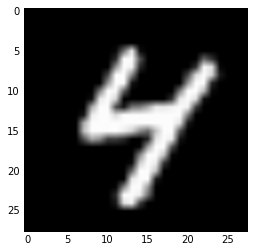

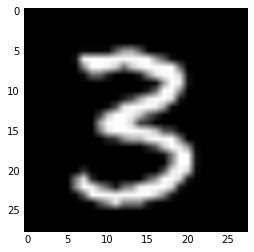

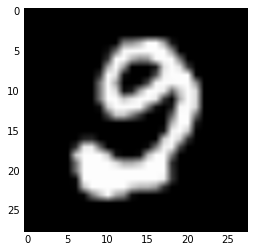

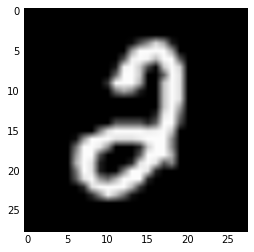

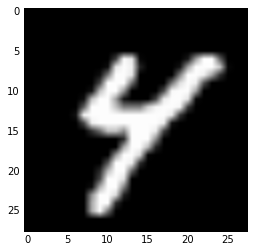

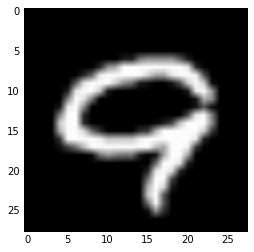

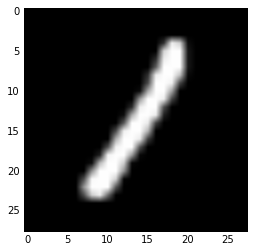

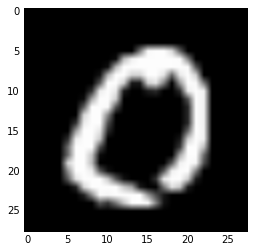

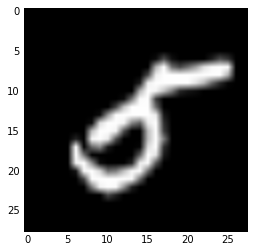

In [48]:
for i in range(1,10):
    plotim(x[i])

In [61]:
# _y = Wx + b
# Model
x = tf.placeholder(tf.float32)
W = tf.Variable(tf.zeros([784,10]),name='weight')
b = tf.Variable(tf.zeros(10),name='bias')
_y = tf.nn.softmax(tf.matmul(x,W) + b)

In [65]:
_y.eval({x: trainX[0].reshape([1,784])})

array([[ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1]], dtype=float32)

In [66]:
# actual y
y = tf.placeholder(tf.float32,[None,10])

In [69]:
# cost : squared error? (y-_y)^2
cce = tf.nn.softmax_cross_entropy_with_logits(_y,y)

In [73]:
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cce)

In [75]:
sess.run(tf.initialize_all_variables())

In [99]:
for i in range(10000):
    batchX, batchY = mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x : batchX,y : batchY})

In [86]:
_y.eval({x:trainX[58].reshape(1,784)}).argmax()

3

In [93]:
# Accuracy
eq = tf.equal(tf.argmax(y,1),tf.argmax(_y,1))
accuracy = tf.reduce_mean(tf.cast(eq,tf.float32))

In [100]:
testX, testY = mnist.test.next_batch(100)
sess.run(accuracy,feed_dict= {x : testX, y : testY})

0.65999997